# No-show Appointments Dataset

## This dataset collected information for over 100,000 appointments from medical facilities in Brazil.
### Information within this dataset includes:

**Patient ID** - Unique identifier for each patient

**Appointment ID** - Unique identidier for eacg appointment

**Gender** - Male or Female

**Scheduled Day** - The day the appointment was scheduled

**Appointment Day** - The day of the appointment

**Age** - How old the patient is

**Neighbourhood** - The location of the hospital

**Scholarship** - This indicates where or not the patient is enrolled in the Brasilian welfare program, Bolsa Familia. More info here: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) 1 = Enrolled, 0 = Not Enrolled

4 seperate Columns for whether the patient has **hypertension**, **diabetes**, **alcoholism** or **handicapped**

**SMS Received** - Whether 1 or more messages were sent to the patient. It is unclear if this is an appointment reminder or not.

**No-show** - Whether the patient no-showed to their appointment or not. No = Showed up, Yes = No-Showed


<sup>The detailed descriptions of each of the columns was provided by kaggle: https://www.kaggle.com/joniarroba/noshowappointments.<sub>

## With this information, we can explore what factors increase the likelihood of a patient no-showing.

## Questions to ask for this dataset

- Does gender influence no show rates? 
- Are there certain age groups that have an increased liklihood to no show?
- Does the elapsed time between Scheduled Day and Appointment Day affect the likliehood of a no show?
- Do certain days of the week ie. Friday, affect no show rates?
- Do any medical impairments affect no shows?
- If the patient received an SMS, does this increase the liklihood to no show?
- Does having a scholarship affect no-shows?
- Does the hospitals neighbourhood affect no-shows?

# Data Assessment and Cleaning

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the csv. file

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Discovering columns and rows

In [4]:
df.shape

(110527, 14)

### Discovering index numbers, null values, dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Checking for duplicate rows

In [7]:
sum(df.duplicated())

0

### Dropping irrelevant columns

We do not need PatientID or AppointmentID, so we will drop these from the dataframe

In [8]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [9]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Columns should be converted to lower case, and the"-" in no-show should be an underscore

In [10]:
df.rename(columns =lambda x: x.strip().lower().replace("-","_"),inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Underscores were added to seperate the columns with two words. This makes it more readable. Also correct the spelling error of hipertension

In [11]:
df.rename(columns={"scheduledday":"scheduled_day"},inplace=True)
df.rename(columns={"appointmentday":"appointment_day"},inplace=True)
df.rename(columns={"hipertension":"hypertension"},inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Saving cleaned data

In [12]:
df.to_csv('clean_noshowappointments-kagglev2-may-2016.csv',index=False)

## Exploring the Data

### Exploring the gender column

In [13]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

### Exploring the age column

In [14]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

Minimum -1 Age and Max Age 115? Further exploring this.

In [15]:
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
df.query('age == 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
59,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


There are over 3539 entries where the age = 0. It's most likely that this age refers to infants under the age of 1. 

To find out the representation of where age = 0, we can divide the rows where age = 0 by the total number of rows

3539 / 110527

0.032 or 3.2% of our data

These rows will not be considered as outliers, since they do make up a fair portion of our data.

In [17]:
df.query('age > 100')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
58014,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


### Ages <0 and >100 will be treated as outlier, and removed from the dataset

In [18]:
df = df[(df.age >= 0) & (df.age <= 100)]
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
96       17
97       11
98        6
100       4
99        1
Name: age, Length: 101, dtype: int64

### Exploring the scheduled day and appointment day columns

In [19]:
df.scheduled_day

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: scheduled_day, Length: 110519, dtype: object

In [20]:
df.appointment_day

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: appointment_day, Length: 110519, dtype: object

The scheduled day has not only date, but also time stamps. But the appointment day column time stamp portion is 0.

The solution to remove time information from date-time strings was found here: https://stackoverflow.com/questions/29310116/removing-time-from-datetime-variable-in-pandas

In [21]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [22]:
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Exploring the neighbourhood column

In [23]:
df.neighbourhood.nunique()

81

In [24]:
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

There are over 81 unique Neighbourhoods stored in this database. To figure out our question whether neighbourhood affects no show rates, the proportions need to be calculated

### Exploring the scholarship and SMS columns

In [25]:
df.scholarship.value_counts()

0    99658
1    10861
Name: scholarship, dtype: int64

In [26]:
df.sms_received.value_counts()

0    75038
1    35481
Name: sms_received, dtype: int64

### Exploring medical condition columns

In [27]:
df.hypertension.unique()

array([1, 0], dtype=int64)

In [28]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [29]:
df.alcoholism.unique()

array([0, 1], dtype=int64)

In [30]:
df.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

Handcap has 4 levels. Unsure what the levels relate to.

### Create a dataframe that filters patients who no-showed.

In [112]:
dfnoshow = df[df['no_show'] == 'Yes']
dfnoshow.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,agegroup,day_difference,day_of_week
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,20-34,2,Friday
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,35-49,2,Friday
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,20-34,3,Friday
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,35-49,1,Friday
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,20-34,2,Friday


## Visualizing and drawing conclusions

### Visualizing the total # of no shows.

In [32]:
df['no_show'].value_counts()

No     88203
Yes    22316
Name: no_show, dtype: int64

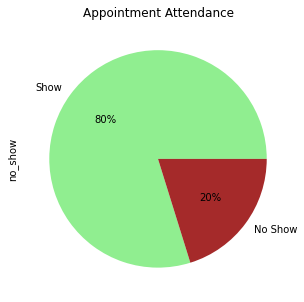

In [33]:
colors = ['lightgreen', 'brown']
labels = 'Show', 'No Show'
df['no_show'].value_counts().plot(kind='pie', 
                                  title= 'Appointment Attendance',
                                  labels=labels,
                                  colors=colors,
                                  autopct='%1.0f%%',
                                  figsize=(5,5));

A list of the named colors was found here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

### 20% of appointments in this Dataset were No-shows

### Visualizing Male to Female Ratio

In [105]:
df.groupby(['gender'])[['gender']].count()

,gender
gender,
F,71666
M,38628


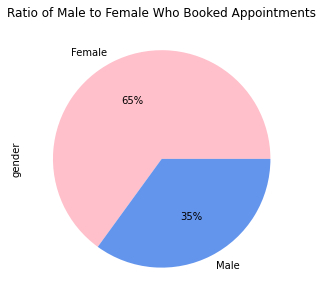

In [34]:
colors = ['pink', 'cornflowerblue']
labels = ['Female', 'Male']
df.gender.value_counts().plot(kind='pie', autopct='%1.0f%%', title='Ratio of Male to Female Who Booked Appointments',
                              labels=labels, colors=colors, figsize=(5,5));

### 65% of patients are Female

### Does gender influence no-show rates?
We know that there are a much greater number of Female appointments, so the proportion should be calculated

Female Proportions = counts for each female no-show / total # female entries

Male Proportions = counts for each male no-show / total # male entries

In [35]:
gender_counts = df.groupby(['gender', 'no_show']).count()['age']
gender_counts

gender  no_show
F       No         57241
        Yes        14591
M       No         30962
        Yes         7725
Name: age, dtype: int64

In [36]:
gender_totals = df.groupby('gender').count()['age']
gender_totals

gender
F    71832
M    38687
Name: age, dtype: int64

In [37]:
female_proportions = gender_counts['F'] / gender_totals['F']
female_proportions

no_show
No     0.796873
Yes    0.203127
Name: age, dtype: float64

In [38]:
male_proportions = gender_counts['M'] / gender_totals['M']
male_proportions

no_show
No     0.800321
Yes    0.199679
Name: age, dtype: float64

### Plotting Gender Proportions

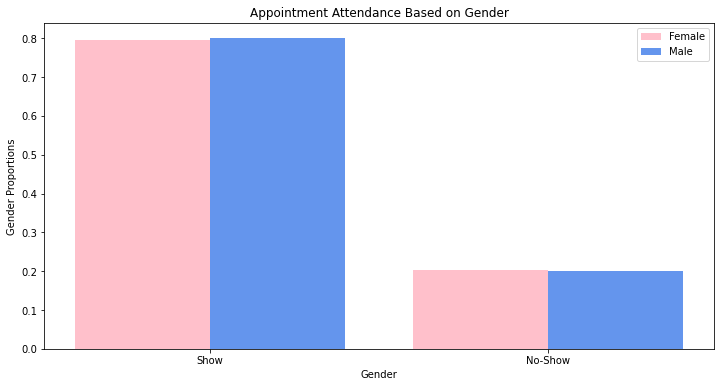

In [39]:
# Creating the figure
ind = np.arange(len(female_proportions)) # the label locations
width = 0.4 # width between the bars
plt.figure(figsize=(12,6))
female_bars = plt.bar(ind, female_proportions, width, color='pink', label='Female')
male_bars = plt.bar(ind + width, male_proportions, width, color='cornflowerblue', label='Male')
plt.ylabel('Gender Proportions')
plt.xlabel('Gender')
plt.title('Appointment Attendance Based on Gender')
locations = ind + width / 2
labels = ['Show', 'No-Show']
plt.xticks(locations,labels)
plt.legend();

### Conclusion: Gender does not influence no-show rates

### Does Age influence no-show rates?

### To better analyze the Age column, the ages should be grouped into ranges.

In [40]:
bins = [0, 20, 35, 50, 65, 80, 115]
labels = ['0-19', '20-34', '35-49', '50-64', '65-79', '80+']

df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['agegroup'].head()

0    50-64
1    50-64
2    50-64
3     0-19
4    50-64
Name: agegroup, dtype: category
Categories (6, object): ['0-19' < '20-34' < '35-49' < '50-64' < '65-79' < '80+']

### Confirming the ages fall within the correct Age Group

In [41]:
df[['age', 'agegroup']].head(10)

,age,agegroup
0,62,50-64
1,56,50-64
2,62,50-64
3,8,0-19
4,56,50-64
5,76,65-79
6,23,20-34
7,39,35-49
8,21,20-34
9,19,0-19


In [42]:
df.query('age == 20')['agegroup'].head()

100    20-34
239    20-34
285    20-34
403    20-34
457    20-34
Name: agegroup, dtype: category
Categories (6, object): ['0-19' < '20-34' < '35-49' < '50-64' < '65-79' < '80+']

In [43]:
df.query('age == 19')['agegroup'].head()

9      0-19
50     0-19
196    0-19
208    0-19
259    0-19
Name: agegroup, dtype: category
Categories (6, object): ['0-19' < '20-34' < '35-49' < '50-64' < '65-79' < '80+']

In [44]:
df.agegroup.value_counts()

0-19     30411
50-64    22634
35-49    21865
20-34    21214
65-79    11039
80+       3356
Name: agegroup, dtype: int64

### Figuring out proportions for each age group

In [45]:
# calculating proportions. This was done differently than the genders
# .size() returns an int representing the number of elements
# size combined with groupby gives us the number of no-shows per neighbourhood

age_noshow = df[df.no_show == 'Yes'].groupby(['agegroup']).size()
age_noshow

agegroup
0-19     6741
20-34    5070
35-49    4490
50-64    3785
65-79    1683
80+       547
dtype: int64

In [46]:
# The same coding is done for totals, except we are including all shows and no shows
age_totals = df.groupby(['agegroup']).size()
age_totals

agegroup
0-19     30411
20-34    21214
35-49    21865
50-64    22634
65-79    11039
80+       3356
dtype: int64

In [47]:
# Now we calculate proportions using favorable / all
age_proportions = age_noshow / age_totals
age_proportions

agegroup
0-19     0.221663
20-34    0.238993
35-49    0.205351
50-64    0.167226
65-79    0.152459
80+      0.162992
dtype: float64

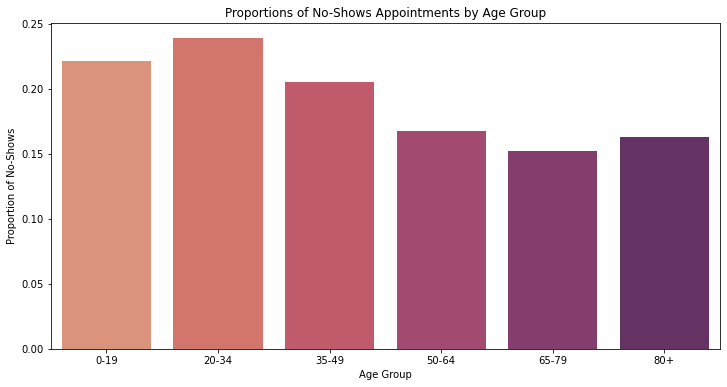

In [48]:
# visualizing our age group findings
plt.figure(figsize=(12,6))
sns.barplot(x=age_proportions.index, y=age_proportions, palette='flare')
plt.title("Proportions of No-Shows Appointments by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Proportion of No-Shows');

Seaborn color palettes can be found here:
https://seaborn.pydata.org/tutorial/color_palettes.html

## Conclusion: Age slightly affects no-show rates. Patients in the age group 20-34 have the highest liklihood at close to 24%, while those in age group 65-79 have the lowest, at 15%.

### Does Neighbourhood influence no-show rates?

In [49]:
df.neighbourhood.value_counts(ascending=True)

PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         8
ILHA DO FRADE                    10
ILHA DO BOI                      35
                               ... 
ITARARÉ                        3514
JARDIM DA PENHA                3877
RESISTÊNCIA                    4431
MARIA ORTIZ                    5804
JARDIM CAMBURI                 7717
Name: neighbourhood, Length: 81, dtype: int64

In [50]:
#dropping the hospitals with little information
df = df[(df.neighbourhood != "ILHAS OCEÂNICAS DE TRINDADE") & (df.neighbourhood != "PARQUE INDUSTRIAL")]

In [51]:
df.neighbourhood.nunique()

79

In [52]:
# calculating proportions. this was done the same way as age no show rates.

neighbourhood_noshow = df[df.no_show == 'Yes'].groupby(['neighbourhood']).size()
neighbourhood_noshow

neighbourhood
AEROPORTO                1
ANDORINHAS             518
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
                      ... 
SÃO JOSÉ               428
SÃO PEDRO              515
TABUAZEIRO             573
UNIVERSITÁRIO           32
VILA RUBIM             141
Length: 79, dtype: int64

In [53]:
neighbourhood_total = df.groupby(['neighbourhood']).size()
neighbourhood_total

neighbourhood
AEROPORTO                 8
ANDORINHAS             2258
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1976
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Length: 79, dtype: int64

In [54]:
# getting proportions
neighbourhood_ratio = neighbourhood_noshow / neighbourhood_total
neighbourhood_ratio

neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.229407
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
                         ...   
SÃO JOSÉ               0.216599
SÃO PEDRO              0.210376
TABUAZEIRO             0.182950
UNIVERSITÁRIO          0.210526
VILA RUBIM             0.165687
Length: 79, dtype: float64

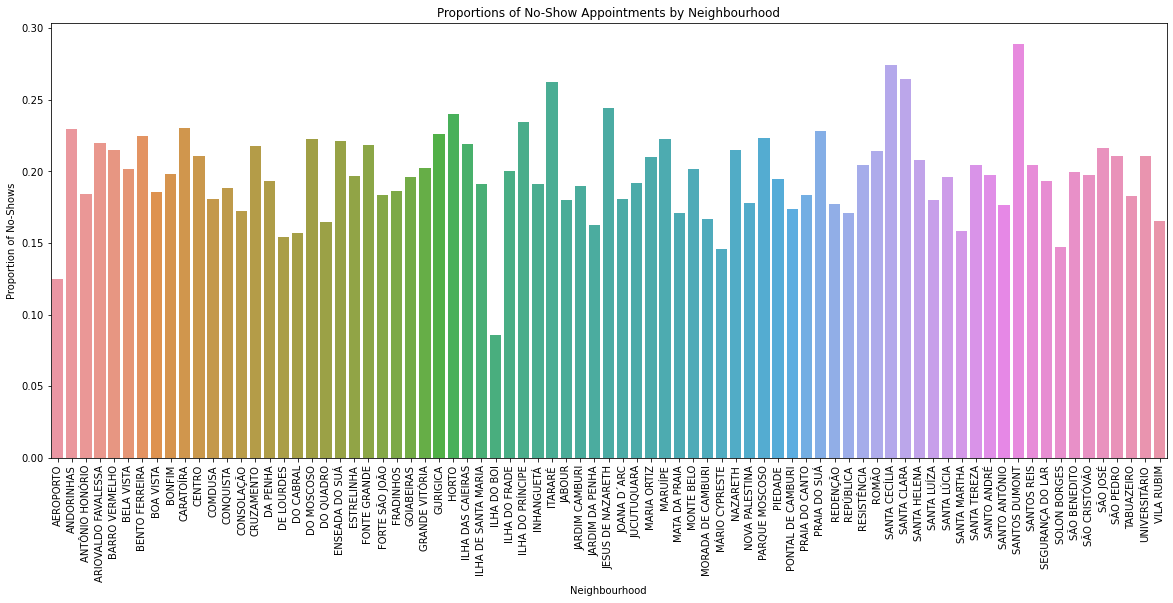

In [55]:
plt.figure(figsize=(20,8))
sns.barplot(x=neighbourhood_ratio.index, y=neighbourhood_ratio)
plt.title("Proportions of No-Show Appointments by Neighbourhood")
plt.ylabel('Proportion of No-Shows')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.show()

## Conclusion: Neighbourhood does not affect no-show rates, with most being around 20%. 

## Are no-show rates affected by those patients on the Brazilian welfare program?

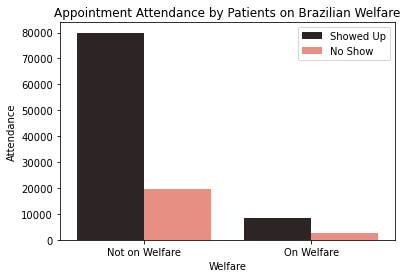

In [56]:
ax = sns.countplot(x='scholarship', hue='no_show', data=df, palette='dark:salmon')
ax.set(xlabel='Welfare', 
       ylabel='Attendance', 
       title='Appointment Attendance by Patients on Brazilian Welfare',
       xticklabels=['Not on Welfare', 'On Welfare'])
plt.legend(['Showed Up', 'No Show']);

In [57]:
scholarship_counts = dfnoshow.scholarship.value_counts()
scholarship_counts # Getting the counts of all who have and dont have scholarships and no-showed.

0    19738
1     2578
Name: scholarship, dtype: int64

In [58]:
noshow_totals = dfnoshow.no_show.count() 
noshow_totals

22316

In [59]:
ratio_scholarship_noshow = scholarship_counts / noshow_totals
ratio_scholarship_noshow

0    0.884478
1    0.115522
Name: scholarship, dtype: float64

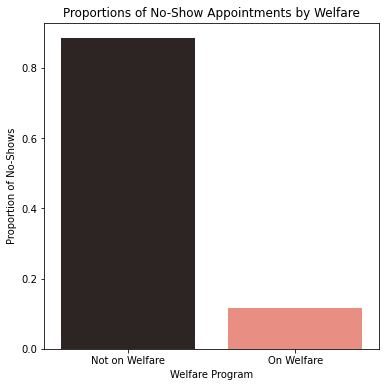

In [60]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=ratio_scholarship_noshow.index, y=ratio_scholarship_noshow, palette='dark:salmon')
ax.set(title="Proportions of No-Show Appointments by Welfare",
       ylabel='Proportion of No-Shows',
       xlabel='Welfare Program',
       xticklabels=['Not on Welfare', 'On Welfare']);

Out of the patients that no-showed, 11% of them were on the Welfare Program.

In [61]:
df_totals = df.no_show.count()

scholarship_percent_all = scholarship_counts / df_totals
scholarship_percent_all

0    0.178599
1    0.023327
Name: scholarship, dtype: float64

Across all appointments, 2.3% were welfare patients that no-showed. 88% of no-shows do not have Welfare, while only 11% of no-shows do.

## Conclusion: Patients on the Brazilian Welfare Program are much less likely to no-show than those not on the program.  Across all appointments, 2.3% were welfare patients that no-showed.

## Do any medical impairments affect no shows?

In [62]:
hypertension_sum = dfnoshow.hypertension.sum() # Getting the sum of all the conditions
diabetes_sum = dfnoshow.diabetes.sum() # This shows only those that have the condition
alcoholism_sum = dfnoshow.alcoholism.sum()

In [63]:
# using the sums divided by no show totals to get proportions
hypertension_sum_ratio = hypertension_sum / noshow_totals
diabetes_sum_ratio = diabetes_sum / noshow_totals
alcoholism_sum_ratio = alcoholism_sum / noshow_totals

In [64]:
noshow_condition_ratios = [hypertension_sum_ratio, diabetes_sum_ratio, alcoholism_sum_ratio]
noshow_condition_ratios

[0.16902670729521418, 0.06407958415486646, 0.030336977953038177]

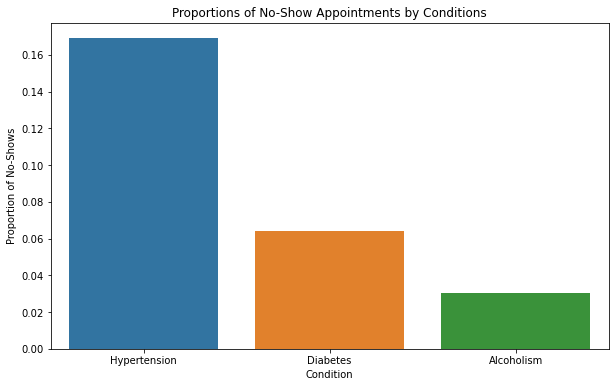

In [65]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=['Hypertension', 'Diabetes', 'Alcoholism'], y=noshow_condition_ratios)

ax.set(title="Proportions of No-Show Appointments by Conditions",
       ylabel='Proportion of No-Shows',
       xlabel='Condition');

### Out of all the no-shows, those with hypertension had the greatest chance at no-showing, at 16.9%. Those with alcoholism had the least chance at no-showing, at 3.0%

In [66]:
df.groupby('no_show')[['hypertension', 'diabetes', 'alcoholism']].mean()

,hypertension,diabetes,alcoholism
no_show,,,
No,0.204394,0.073842,0.030419
Yes,0.169042,0.064085,0.030340


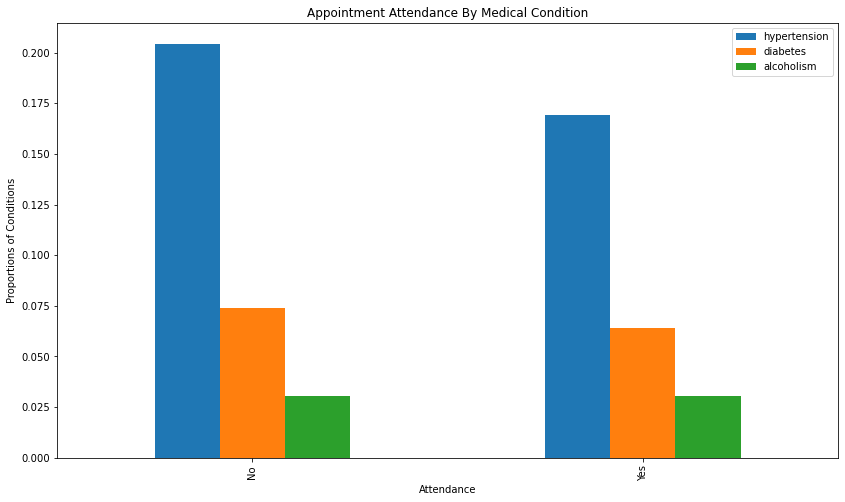

In [67]:
df.groupby('no_show')[['hypertension', 'diabetes', 'alcoholism']].mean().plot.bar(
    figsize=(14,8),
    title='Appointment Attendance By Medical Condition',
    xlabel='Attendance',
    ylabel='Proportions of Conditions');

## Does time elapsed from scheduled day to appointment day impact no-show rates?

In [68]:
#creating a new column to show the time elapsed from the scheduled day to the appointment day
df['day_difference'] = df['appointment_day'] - df['scheduled_day']

In [124]:
df.head(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,agegroup,day_difference,day_of_week
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,50-64,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-64,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,50-64,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-19,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-64,0,Friday


In [131]:
df['appointment_day'].min()

Timestamp('2016-04-29 00:00:00')

In [132]:
df['appointment_day'].max()

Timestamp('2016-06-08 00:00:00')

This dataset collected about 5 weeks of data. From April 29, 2016 to June 8, 2016

In [70]:
# the columns contains a number and a string. using dt.days to convert this to just days in an int format.
df['day_difference'] = df['day_difference'].dt.days

In [71]:
df.query('day_difference > 90')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,agegroup,day_difference
871,M,2016-01-29,2016-04-29,48,MARUÍPE,0,1,0,0,0,1,No,35-49,91
953,F,2016-01-05,2016-04-29,83,REDENÇÃO,0,1,0,0,0,1,No,80+,115
954,M,2016-01-05,2016-04-29,84,SANTO ANDRÉ,0,1,1,0,1,1,No,80+,115
955,F,2016-01-11,2016-04-29,88,PRAIA DO CANTO,0,1,0,0,0,1,No,80+,109
956,M,2016-01-11,2016-04-29,71,REDENÇÃO,0,1,1,0,0,1,No,65-79,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110296,M,2016-02-05,2016-06-06,1,RESISTÊNCIA,0,0,0,0,0,1,No,0-19,122
110321,M,2016-02-11,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,1,No,0-19,111
110331,F,2016-02-24,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,1,Yes,0-19,98
110335,M,2016-02-11,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,1,No,0-19,111


Any negative day should be removed as this seems like an error. Also our of the entire dataset, only 217 appointments were booked 3 months or more ahead. These will be removed as outliers to produce a better visualization.

In [72]:
df = df[df.day_difference <= 90]

In [73]:
df = df[df.day_difference >= 0]
df.day_difference.value_counts()

0     38559
2      6724
4      5290
1      5213
7      4906
      ...  
87       16
81       10
83        8
86        6
82        1
Name: day_difference, Length: 91, dtype: int64

In [74]:
noshow_day_difference = df[df.no_show== 'Yes'].groupby(['day_difference']).size()
noshow_day_difference 

day_difference
0     1792
1     1113
2     1602
3      642
4     1231
      ... 
86       1
87       5
88       5
89       7
90      14
Length: 90, dtype: int64

In [75]:
day_diff_total = df.groupby(['day_difference']).size()
day_diff_total

day_difference
0     38559
1      5213
2      6724
3      2735
4      5290
      ...  
86        6
87       16
88       16
89       17
90       58
Length: 91, dtype: int64

In [76]:
noshow_day_ratio = noshow_day_difference / day_diff_total
noshow_day_ratio

day_difference
0     0.046474
1     0.213505
2     0.238251
3     0.234735
4     0.232703
        ...   
86    0.166667
87    0.312500
88    0.312500
89    0.411765
90    0.241379
Length: 91, dtype: float64

In [123]:
noshow_day_ratio.mean()

0.3128082827057973

The mean percentage of no-shows all appointments booked 3 months and under is 31.2%

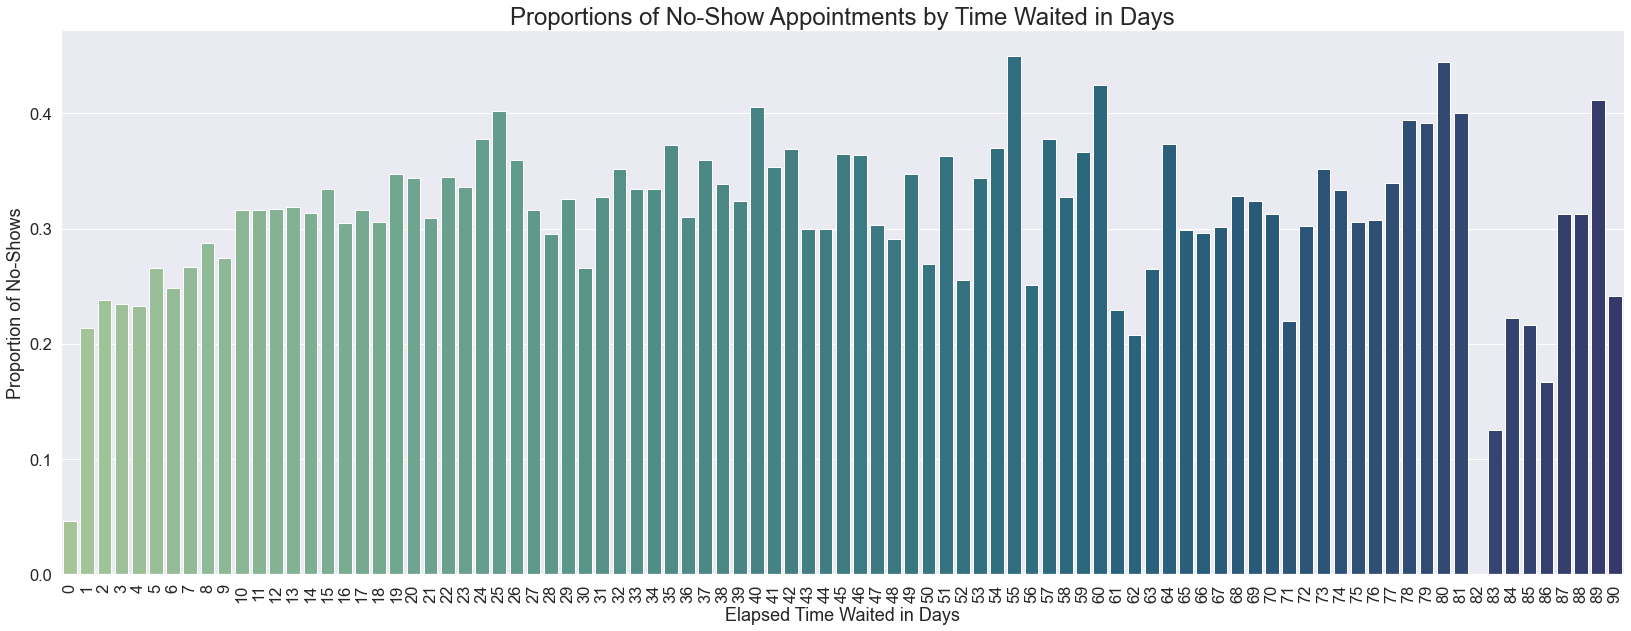

In [77]:
plt.figure(figsize=(28,10))
sns.set(font_scale=1.5)
sns.barplot(x=noshow_day_ratio.index, y=noshow_day_ratio, palette='crest')
plt.title("Proportions of No-Show Appointments by Time Waited in Days", fontsize = 24)
plt.ylabel('Proportion of No-Shows')
plt.xlabel('Elapsed Time Waited in Days')
plt.xticks(rotation=90)
plt.show()

## Conclusion: Patients who book their appointments on the same day as visiting the hospital have a much lower chance of no-showing. Only 4.6% will no-show on same day bookings. There does not appear to be any more trends outside of this observation. 

## Do certain days of the week ie. Friday, affect no show rates?

In [78]:
# Making a column that takes the appointment day and turns it into the name of the day of the week.
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

df['day_of_week'] = df['appointment_day'].dt.day_name()

Found the solution to convert time to day of the week here: https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python

In [79]:
dayofweek_total = df.day_of_week.value_counts()
dayofweek_total

Wednesday    25784
Tuesday      25609
Monday       22681
Friday       18964
Thursday     17217
Saturday        39
Name: day_of_week, dtype: int64

It seems the hospitals have no appointments on sundays, and very few on Saturdays.

In [80]:
noshow_dayofweek = df[df.no_show== 'Yes'].groupby(['day_of_week']).size()
noshow_dayofweek

day_of_week
Friday       4027
Monday       4682
Saturday        9
Thursday     3325
Tuesday      5146
Wednesday    5064
dtype: int64

In [81]:
dayofweek_ratio = noshow_dayofweek / dayofweek_total
dayofweek_ratio

Friday       0.212350
Monday       0.206428
Saturday     0.230769
Thursday     0.193123
Tuesday      0.200945
Wednesday    0.196401
dtype: float64

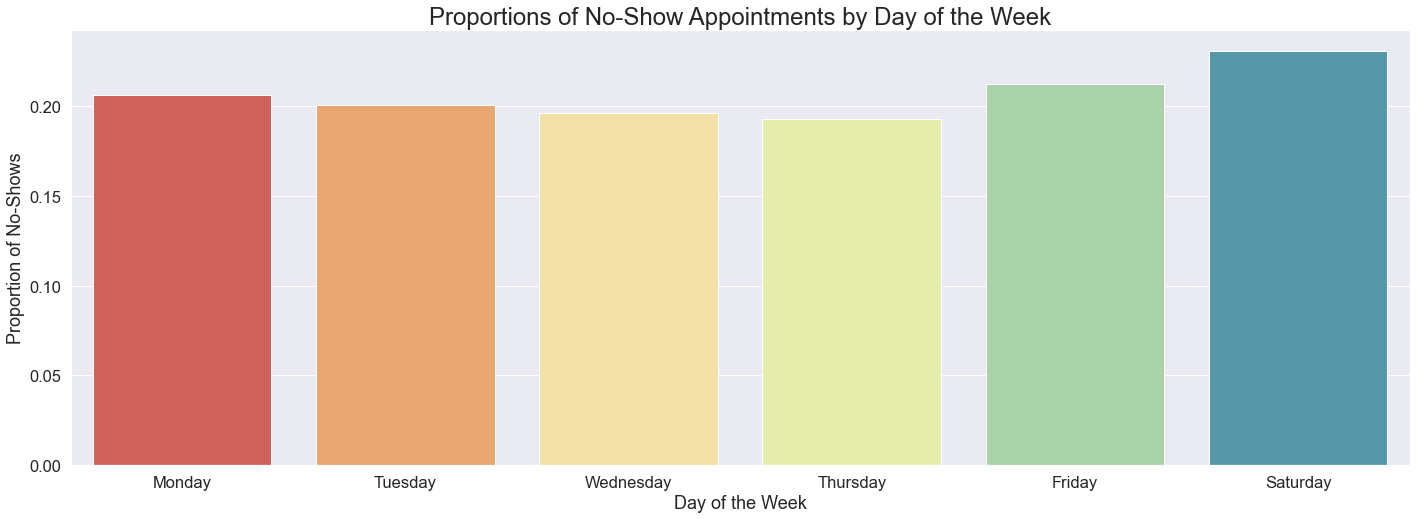

In [82]:
# The days of the week need to be ordered manually to visualize them in that order, or else it takes the ratio order above
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=(24,8))
sns.set(font_scale=1.5)
sns.barplot(x=dayofweek_ratio.index, y=dayofweek_ratio, palette='Spectral', order=week_order)
plt.title("Proportions of No-Show Appointments by Day of the Week", fontsize = 24)
plt.ylabel('Proportion of No-Shows')
plt.xlabel('Day of the Week')
plt.show()

## Saturdays have the highest percentage of no-shows, at 23%.  While Thursdays are at 19% no-show rate. But there were only 9 counts of Saturday appointments, and therefore this data is inconclusive.

## Do patients with handicaps influence the rate of no-shows?

In [83]:
handcap_counts = df[df.no_show == 'Yes'].groupby(['handcap']).size()
handcap_counts

handcap
0    21856
1      356
2       37
3        3
4        1
dtype: int64

In [84]:
handcap_totals = df.groupby(['handcap']).size()
handcap_totals

handcap
0    108074
1      2021
2       183
3        13
4         3
dtype: int64

In [85]:
handcap_ratio = handcap_counts / handcap_totals
handcap_ratio

handcap
0    0.202232
1    0.176150
2    0.202186
3    0.230769
4    0.333333
dtype: float64

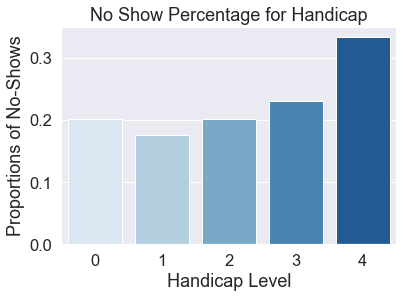

In [86]:
ax = sns.barplot(x=handcap_ratio.index, y=handcap_ratio, palette="Blues")
ax.set(title="No Show Percentage for Handicap",
            ylabel='Proportions of No-Shows',
            xlabel='Handicap Level');

## Patients with level 4 handicap level have a 33% chance to no-show. But there are only 3 patients marked with handicap 4, therefore this data is inconclusive.

## If the patient received an SMS, does this increase the liklihood to no show?

In [87]:
noshow_sms_counts = dfnoshow.sms_received.value_counts()
noshow_sms_counts

0    12532
1     9784
Name: sms_received, dtype: int64

In [88]:
sms_ratios = noshow_sms_counts / df_totals
sms_ratios

0    0.113395
1    0.088530
Name: sms_received, dtype: float64

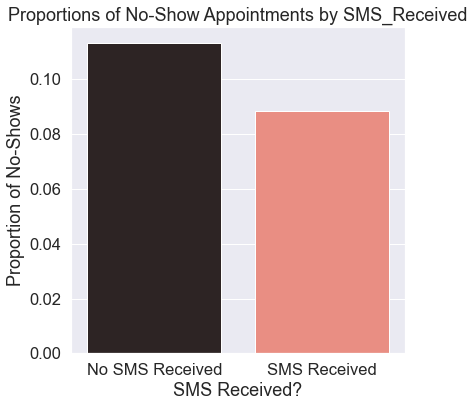

In [89]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=sms_ratios.index, y=sms_ratios, palette='dark:salmon')
ax.set(title="Proportions of No-Show Appointments by SMS_Received",
       ylabel='Proportion of No-Shows',
       xlabel='SMS Received?',
       xticklabels=['No SMS Received', 'SMS Received']);

11.3% of patients who did not recieve an SMS no-showed, while only 8.8% of patients who receive an SMS no-showed.

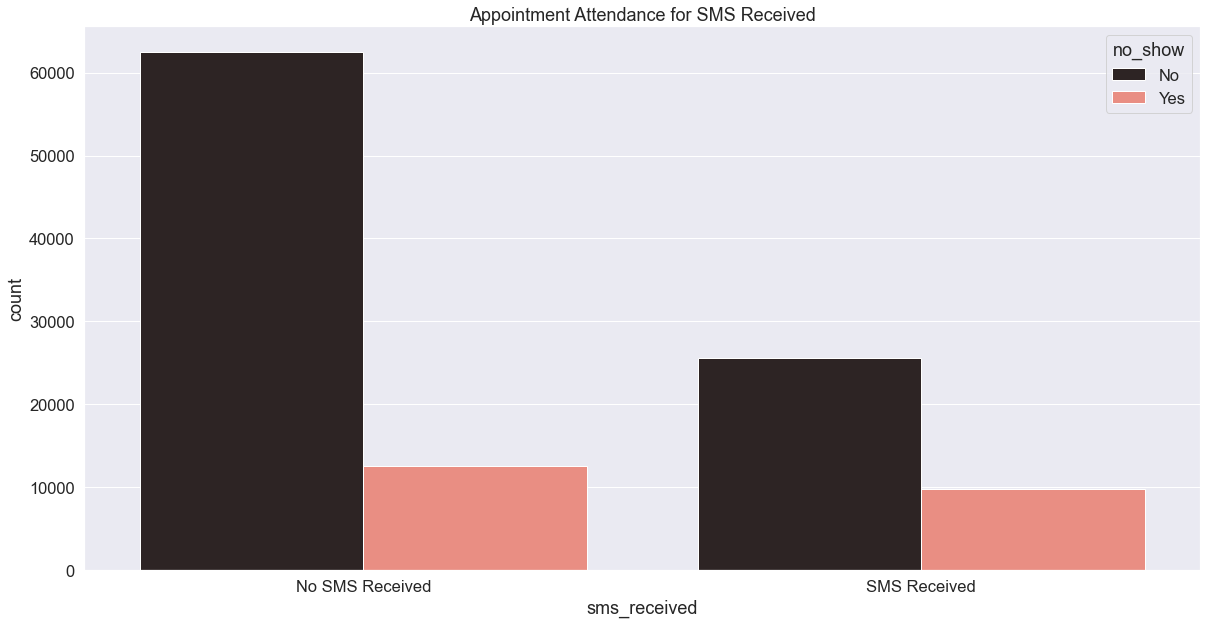

In [90]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df.sms_received, hue=df.no_show,  palette='dark:salmon')

ax.set_title('Appointment Attendance for SMS Received')
x_ticks_labels=['No SMS Received', 'SMS Received']
ax.set_xticklabels(x_ticks_labels);

## Patients that recieved an SMS are 2.5% less likely of no-showing compared to those who did not recieve an SMS.

# Summary and final conclusion

### Contributing factors to patients that no-show to their appointments


**Top Contributing Factors:**
1. Scholarship(Welfare)

There was a marked decrease in those who had scholarships and no-showed. 2.3% of all appointments represented patients who had welfare and no-showed

2. Conditions

When comparing hypertension, diabetes and alcoholism it was shown that patients with alcoholism had a 3% chance to no-show, while hypertension patients are upwards of 17%

3. Age

Certain age groups no-showed more. Those from 20-34 had the highest percentage at 24%, while those in the age group of 65-79 had the least chance at 15%.

4. Appointment Day

Patients who scheduled appointments and then visited the hosipital the same day had a 4.6% chance of no-showing. 

**Minor contributing factors:**

2. SMS Received

Those that recieved an SMS are 2.5% less likely to no-show.


## Limitations

This dataset included 110,000 appointments from April 29, 2016 to June 8, 2016. This is just a snapshot of data. There were no null values, but there was some incorrect data that was removed from the analysis. The day of the week analysis was limited due to little data, but with more we might be able to determine if weekends have a higher rate of no-shows. Handicap analysis was limited with little data as well. More data over a longer period of time would provide better insights.

Additionally, a column that records whether the patient is brand new to the hospital, or whether they are repeat patients who have been there before would provide important insights. Working in a veterinary clinic myself, it is observed that new clients no-show more often, as they have not yet formed a relationship with the clinic and the doctors.

One more useful factor would be the reason for the appointment. Patients procedures such as rechecks or general wellness exams might have a higher chance to no-show. Patients who are sick could be more likely to show up.